In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Problem statement: To classify the loan status as yes or no according to the applicant's income and other specifications

In [87]:
data=pd.read_csv('loan_sanction_train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [88]:
Counter(data.Loan_Status)

Counter({'Y': 422, 'N': 192})

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [90]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## EDA, Data cleaning and preprocessing

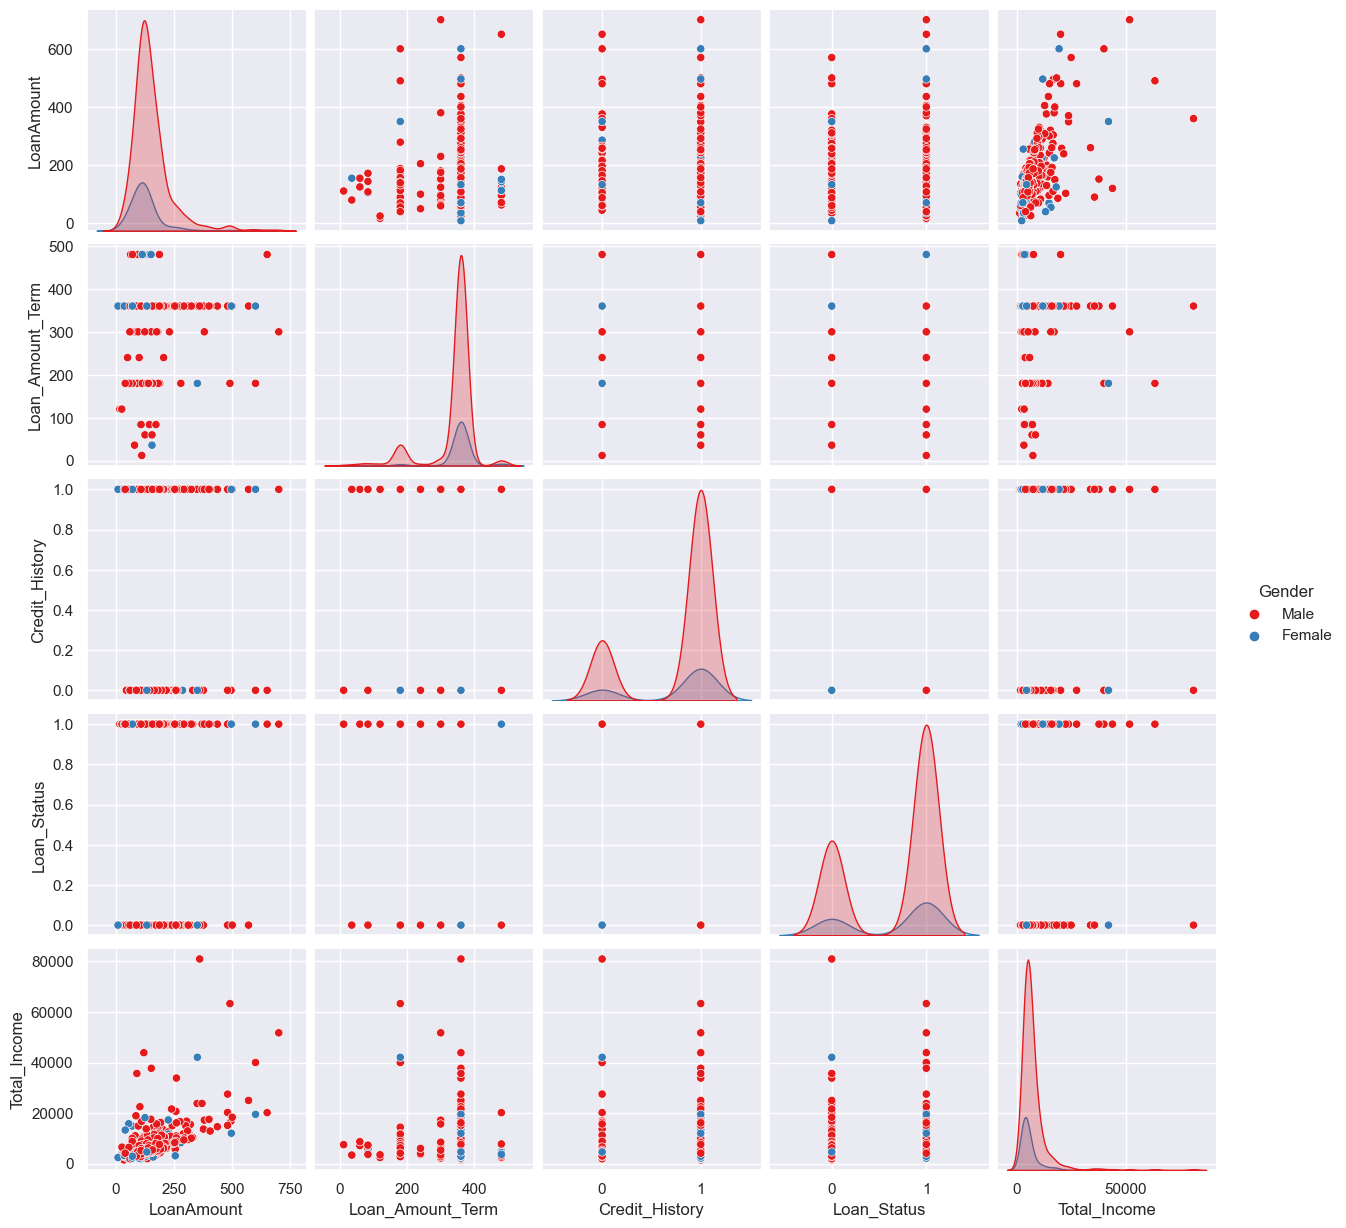

In [155]:
sns.pairplot(data, hue="Gender", palette="Set1")
plt.show()

In [92]:
data.Loan_Status=data.Loan_Status.map({"Y":1, "N":0})

In [93]:
data=data.drop("Loan_ID", axis=1)
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


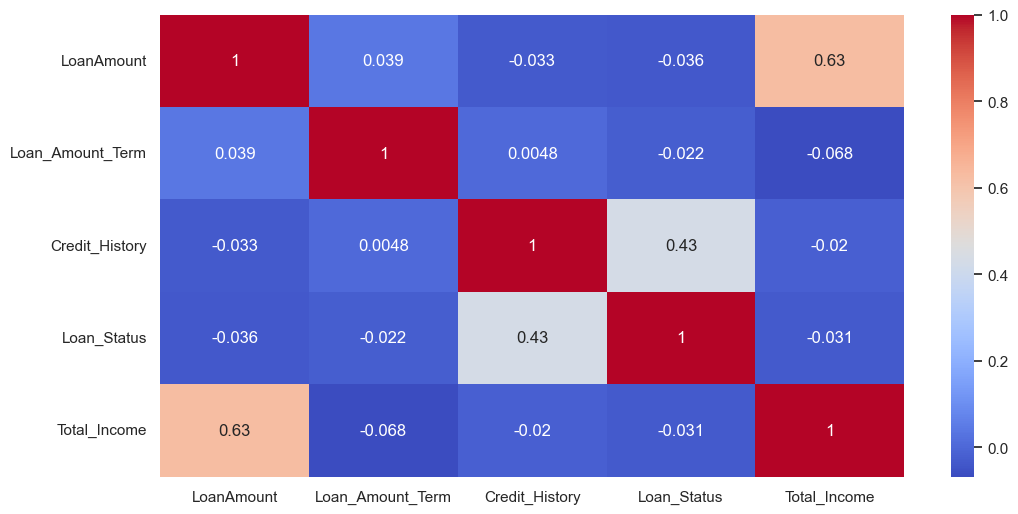

In [154]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

### Gender

In [95]:
Counter(data.Gender)

Counter({'Male': 489, 'Female': 112, nan: 13})

In [96]:
Counter(data.Gender)['Female']/data.shape[0]*13

2.3713355048859937

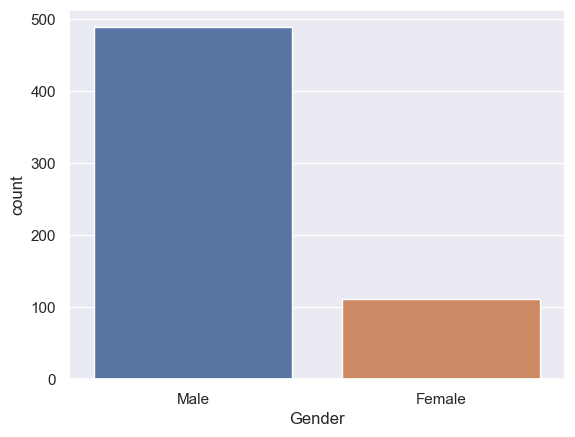

In [97]:
sns.countplot(data=data,x="Gender")
plt.show()

In [98]:
data.Gender.fillna(value="Male", inplace=True)

In [99]:
Counter(data.Gender)

Counter({'Male': 502, 'Female': 112})

In [100]:
per_gender=data.groupby(["Gender", 'Loan_Status']).mean().reset_index()
px.bar(per_gender, x="Gender", y="LoanAmount", color="Loan_Status", text_auto='.2s')

### Married

In [101]:
Counter(data.Married)

Counter({'No': 213, 'Yes': 398, nan: 3})

In [102]:
Counter(data.Married)['No']/data.shape[0]*3

1.0407166123778502

In [103]:
data.isna().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
data[data.Married.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1


In [105]:
data=data.dropna(subset=['Married'])

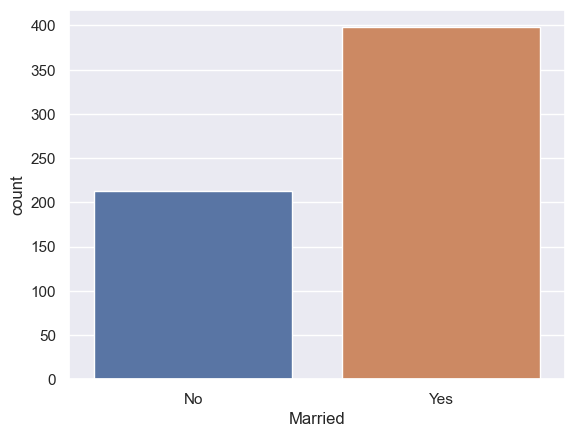

In [151]:
sns.countplot(data=data,x="Married")
plt.show()

In [107]:
per_marital=data.groupby(["Married", 'Loan_Status']).mean().reset_index()
px.bar(per_marital, x="Married", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Dependants

In [108]:
Counter(data.Dependents)

Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 12})

In [109]:
data[data.Dependents.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
517,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,0


In [110]:
data.loc[(data['Gender'] == 'Female') & (data['Married'] == 'No'), 'Dependents']=\
data.loc[(data['Gender'] == 'Female') & (data['Married'] == 'No'), 'Dependents'].fillna("0")

In [111]:
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'No'), 'Dependents']=\
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'No'), 'Dependents'].fillna("0")

In [112]:
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] == 0), 'Dependents']=\
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] == 0), 'Dependents'].fillna("1")

In [113]:
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] > 0), 'Dependents']=\
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] > 0), 'Dependents'].fillna("0")

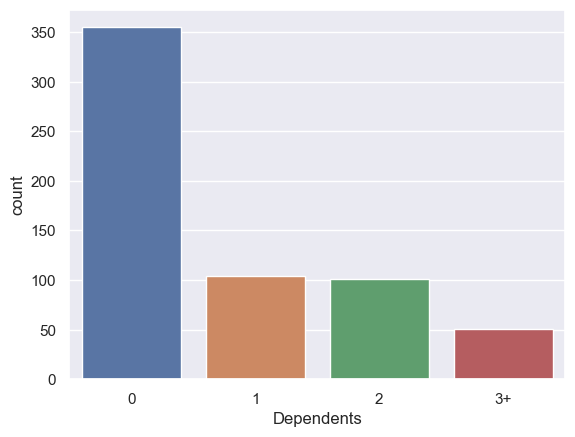

In [150]:
sns.countplot(data=data,x="Dependents")
plt.show()

In [115]:
per_dependency=data.groupby(["Dependents", 'Loan_Status']).mean().reset_index()
px.bar(per_dependency, x="Dependents", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Education

In [116]:
Counter(data.Education)

Counter({'Graduate': 477, 'Not Graduate': 134})

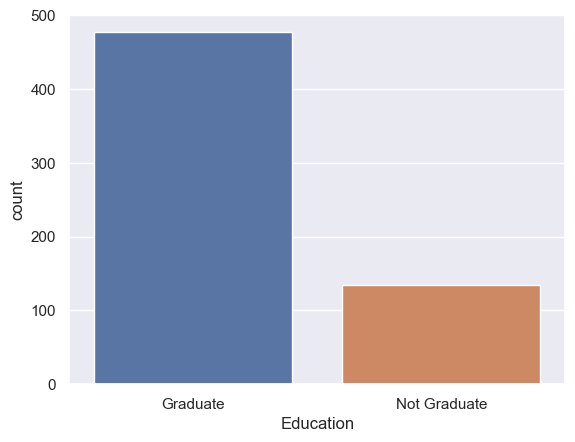

In [149]:
sns.countplot(data=data,x="Education")
plt.show()

In [118]:
per_education=data.groupby(["Education", 'Loan_Status']).mean().reset_index()
per_education

,Education,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Graduate,0,6114.514286,2111.028571,161.388060,350.364964,0.561538
1,Graduate,1,5747.522255,1567.032404,151.045593,342.180723,0.980645
2,Not Graduate,0,3646.442308,1249.903846,122.234043,326.448980,0.489796
3,Not Graduate,1,3860.256098,1293.439024,116.162500,335.696203,0.986111


In [119]:
px.bar(per_education, x="Education", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Self_Employed

In [120]:
Counter(data.Self_Employed)

Counter({'No': 497, 'Yes': 82, nan: 32})

In [121]:
data.Self_Employed=data.Self_Employed.fillna(value="No")

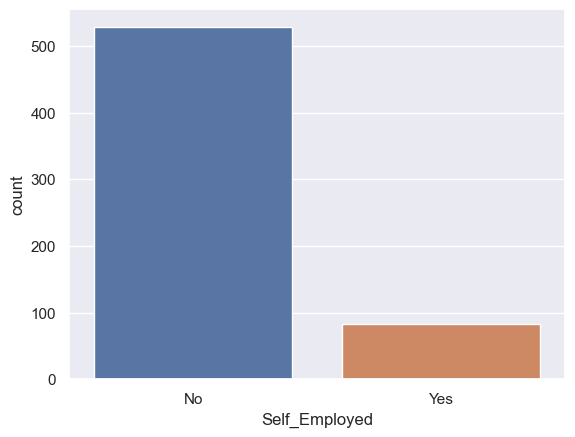

In [148]:
sns.countplot(data=data,x="Self_Employed")
plt.show()

In [123]:
per_self_employment=data.groupby(["Self_Employed", 'Loan_Status']).mean().reset_index()
per_self_employment

,Self_Employed,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,No,0,5346.620482,1888.439759,150.397436,346.350000,0.545455
1,No,1,4976.134986,1537.465344,138.895775,341.176471,0.978916
2,Yes,0,6081.076923,1809.923077,156.360000,330.000000,0.520000
3,Yes,1,7984.267857,1358.071429,179.240741,339.333333,1.000000


In [124]:
px.bar(per_self_employment, x="Self_Employed", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Credit History

In [125]:
data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
data.Credit_History.value_counts()

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [127]:
data.Credit_History=data.Credit_History.fillna(0)

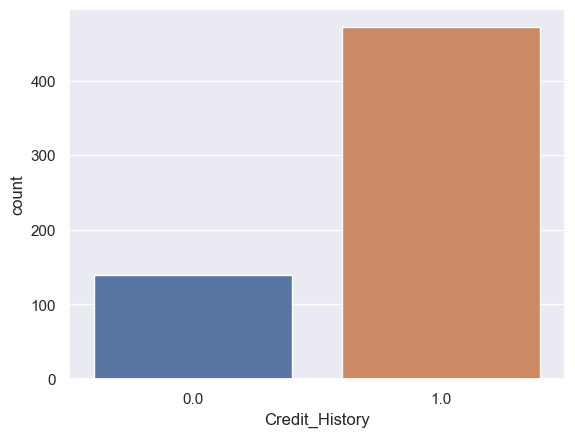

In [147]:
sns.countplot(data=data, x="Credit_History")
plt.show()

In [129]:
per_history=data.groupby(["Credit_History", 'Loan_Status']).mean().reset_index()
per_history

,Credit_History,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,0,5274.694737,1971.094737,146.788889,345.168539
1,0.0,1,5432.454545,1869.818182,162.568182,333.545455
2,1.0,0,5613.927835,1786.443299,155.604396,343.051546
3,1.0,1,5371.808000,1471.679787,142.010959,341.820163


In [130]:
px.bar(per_history, x="Credit_History", y="LoanAmount", color="Loan_Status", text_auto='.2s')

### Property Area

In [131]:
Counter(data.Property_Area)

Counter({'Urban': 201, 'Rural': 179, 'Semiurban': 231})

In [132]:
sns.countplot(data=data, x="Property_Area")

<Axes: xlabel='Property_Area', ylabel='count'>

In [133]:
per_area=data.groupby(["Property_Area", 'Loan_Status']).mean().reset_index()
per_area

,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Rural,0,6497.521739,1436.507246,158.742424,345.134328,0.565217
1,Rural,1,4962.290909,1776.655636,148.261682,345.777778,0.890909
2,Semiurban,0,5296.851852,1563.203704,154.566038,345.509434,0.425926
3,Semiurban,1,5267.016949,1524.169492,142.672414,347.451429,0.915254
4,Urban,0,4511.420290,2565.318841,140.354839,341.818182,0.507246
5,Urban,1,5873.803030,1279.862121,142.953125,327.937500,0.871212


In [134]:
px.bar(per_area, x="Property_Area", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Income

In [135]:
data.ApplicantIncome=data.ApplicantIncome.astype("float")
data.select_dtypes("float64")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [136]:
data["Total_Income"]=data.ApplicantIncome+data.CoapplicantIncome
data=data.drop(["ApplicantIncome", "CoapplicantIncome"], axis=1)

In [137]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,1,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,1,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,1,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,1,7583.0


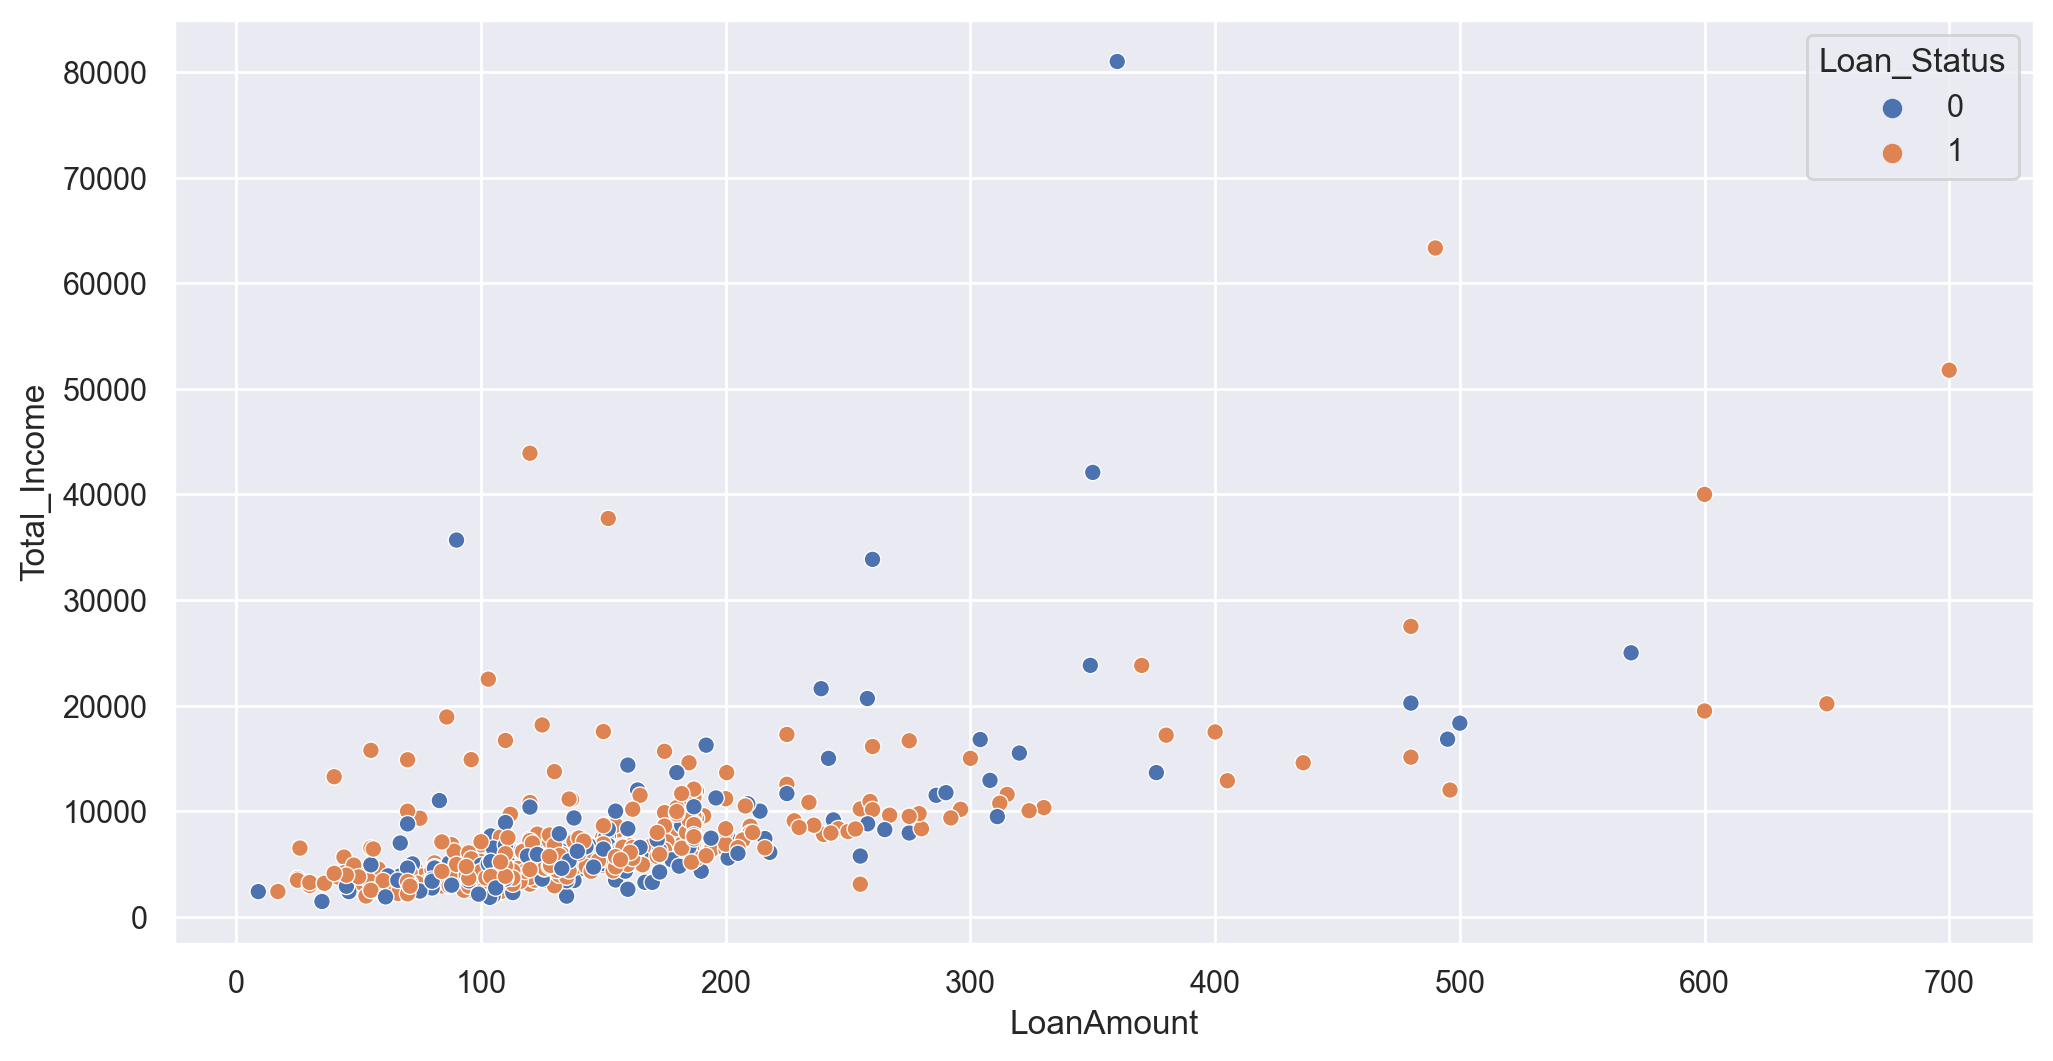

In [146]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=data, x="LoanAmount", y=data.Total_Income, hue="Loan_Status")
plt.show()

In [139]:
data.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
LoanAmount,1.000000,0.039071,-0.035444,-0.037678,0.624968
Loan_Amount_Term,0.039071,1.000000,0.004840,-0.022356,-0.067753
Credit_History,-0.035444,0.004840,1.000000,0.431617,-0.019820
Loan_Status,-0.037678,-0.022356,0.431617,1.000000,-0.031027
Total_Income,0.624968,-0.067753,-0.019820,-0.031027,1.000000


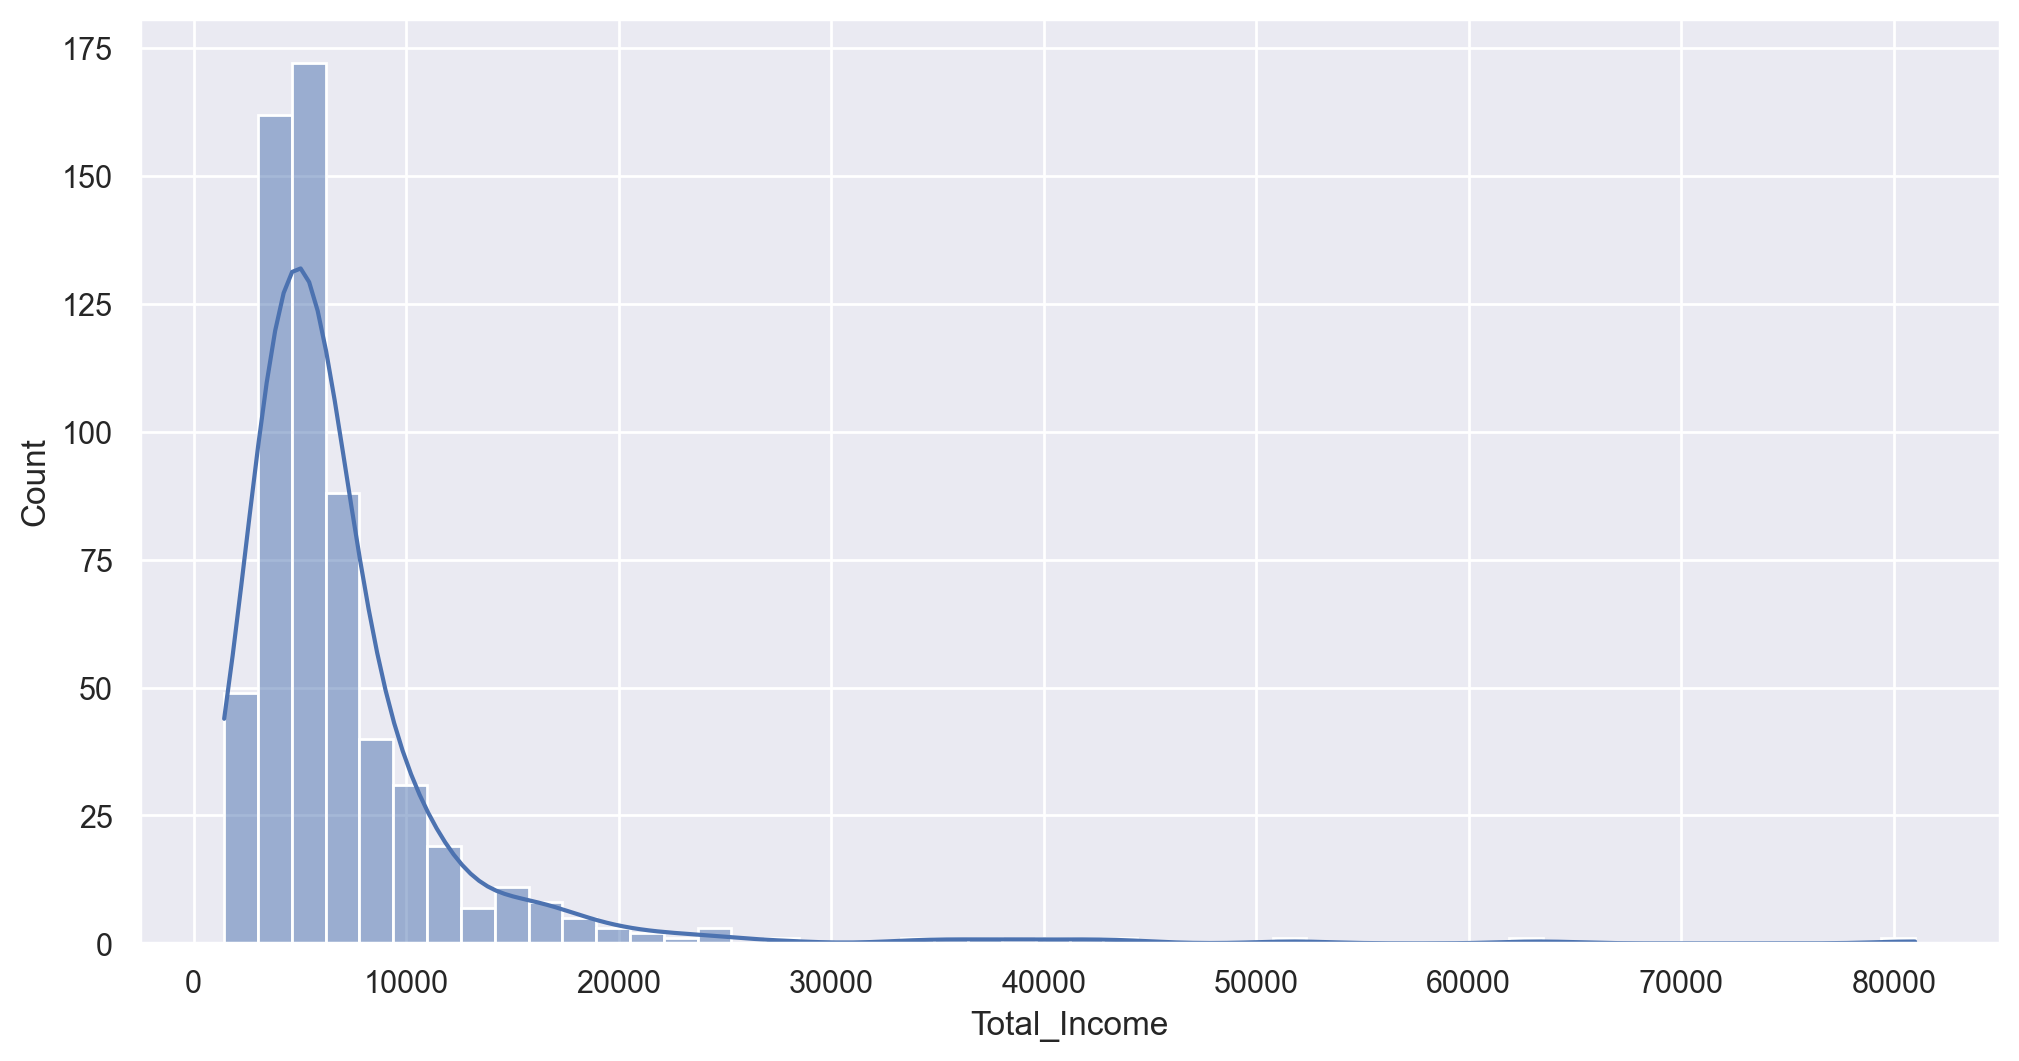

In [140]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data.Total_Income, kde=True, bins=50)
plt.show()

### Loan amount

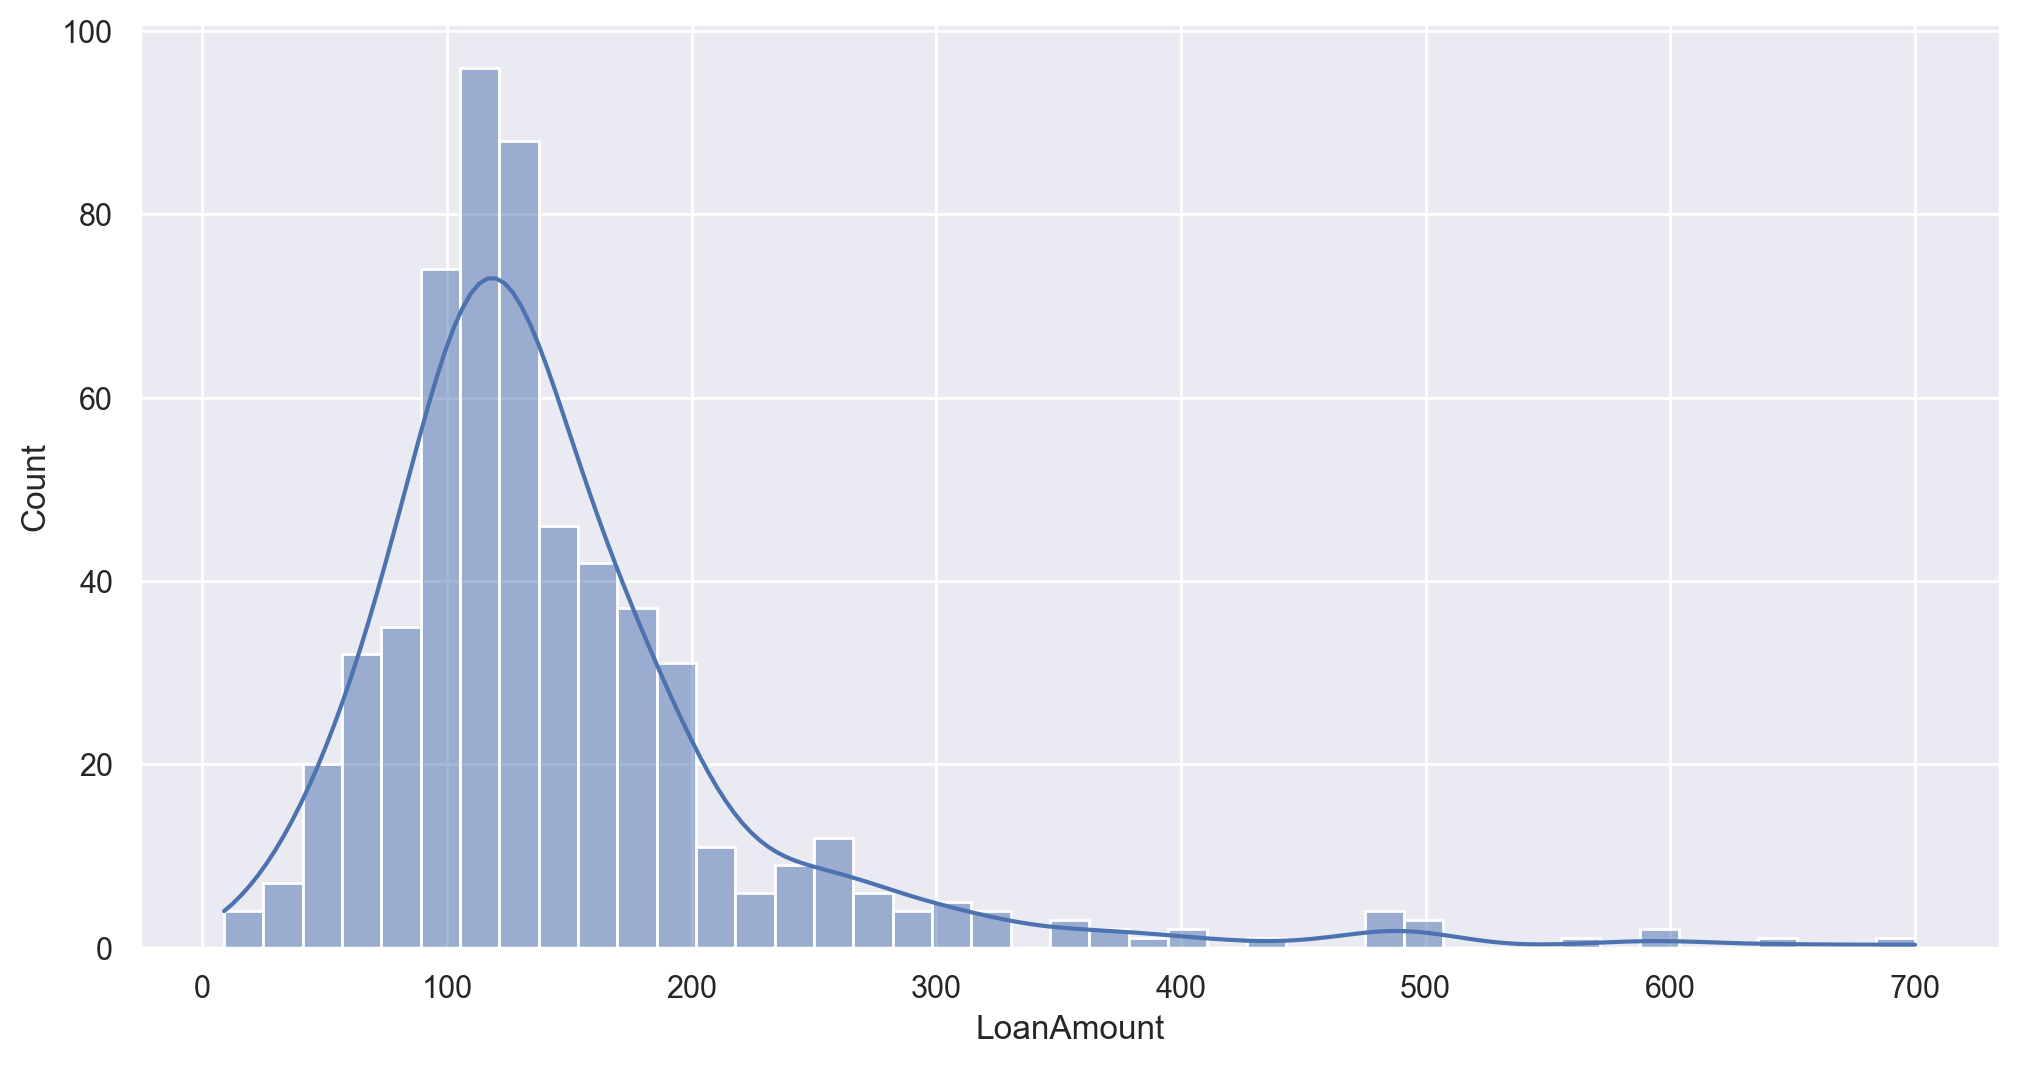

In [141]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data.LoanAmount, kde=True)
plt.show()

In [142]:
data[data.LoanAmount.isna()]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,1,5849.0
35,Male,Yes,0,Graduate,No,NaN,360.0,1.0,Urban,1,4342.0
63,Male,Yes,1,Graduate,No,NaN,360.0,0.0,Rural,0,4945.0
81,Male,Yes,1,Graduate,Yes,NaN,360.0,1.0,Semiurban,1,2395.0
95,Male,No,0,Graduate,No,NaN,360.0,0.0,Urban,0,6782.0
102,Male,Yes,1,Graduate,No,NaN,360.0,1.0,Urban,1,13650.0
103,Male,Yes,0,Graduate,No,NaN,360.0,1.0,Semiurban,1,8235.0
113,Female,No,1,Graduate,Yes,NaN,360.0,1.0,Semiurban,1,7451.0
127,Male,No,0,Graduate,No,NaN,360.0,1.0,Rural,1,5505.0
202,Male,Yes,3+,Not Graduate,No,NaN,180.0,1.0,Urban,0,3992.0


#### Using linear regression between loan amount and total income to fill nan values in loan amount variable

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
df_sub=data[["LoanAmount", "Total_Income"]]
df_missing = df_sub[df_sub.LoanAmount.isnull()]
df_non_missing = df_sub[df_sub.LoanAmount.notnull()]

In [145]:
lr_model=LinearRegression()
lr_model.fit(np.array(df_non_missing.Total_Income).reshape(-1,1), df_non_missing.LoanAmount)
data.loc[data.LoanAmount.isna(), 'LoanAmount']=lr_model.predict(np.array(df_missing.Total_Income).reshape(-1,1))

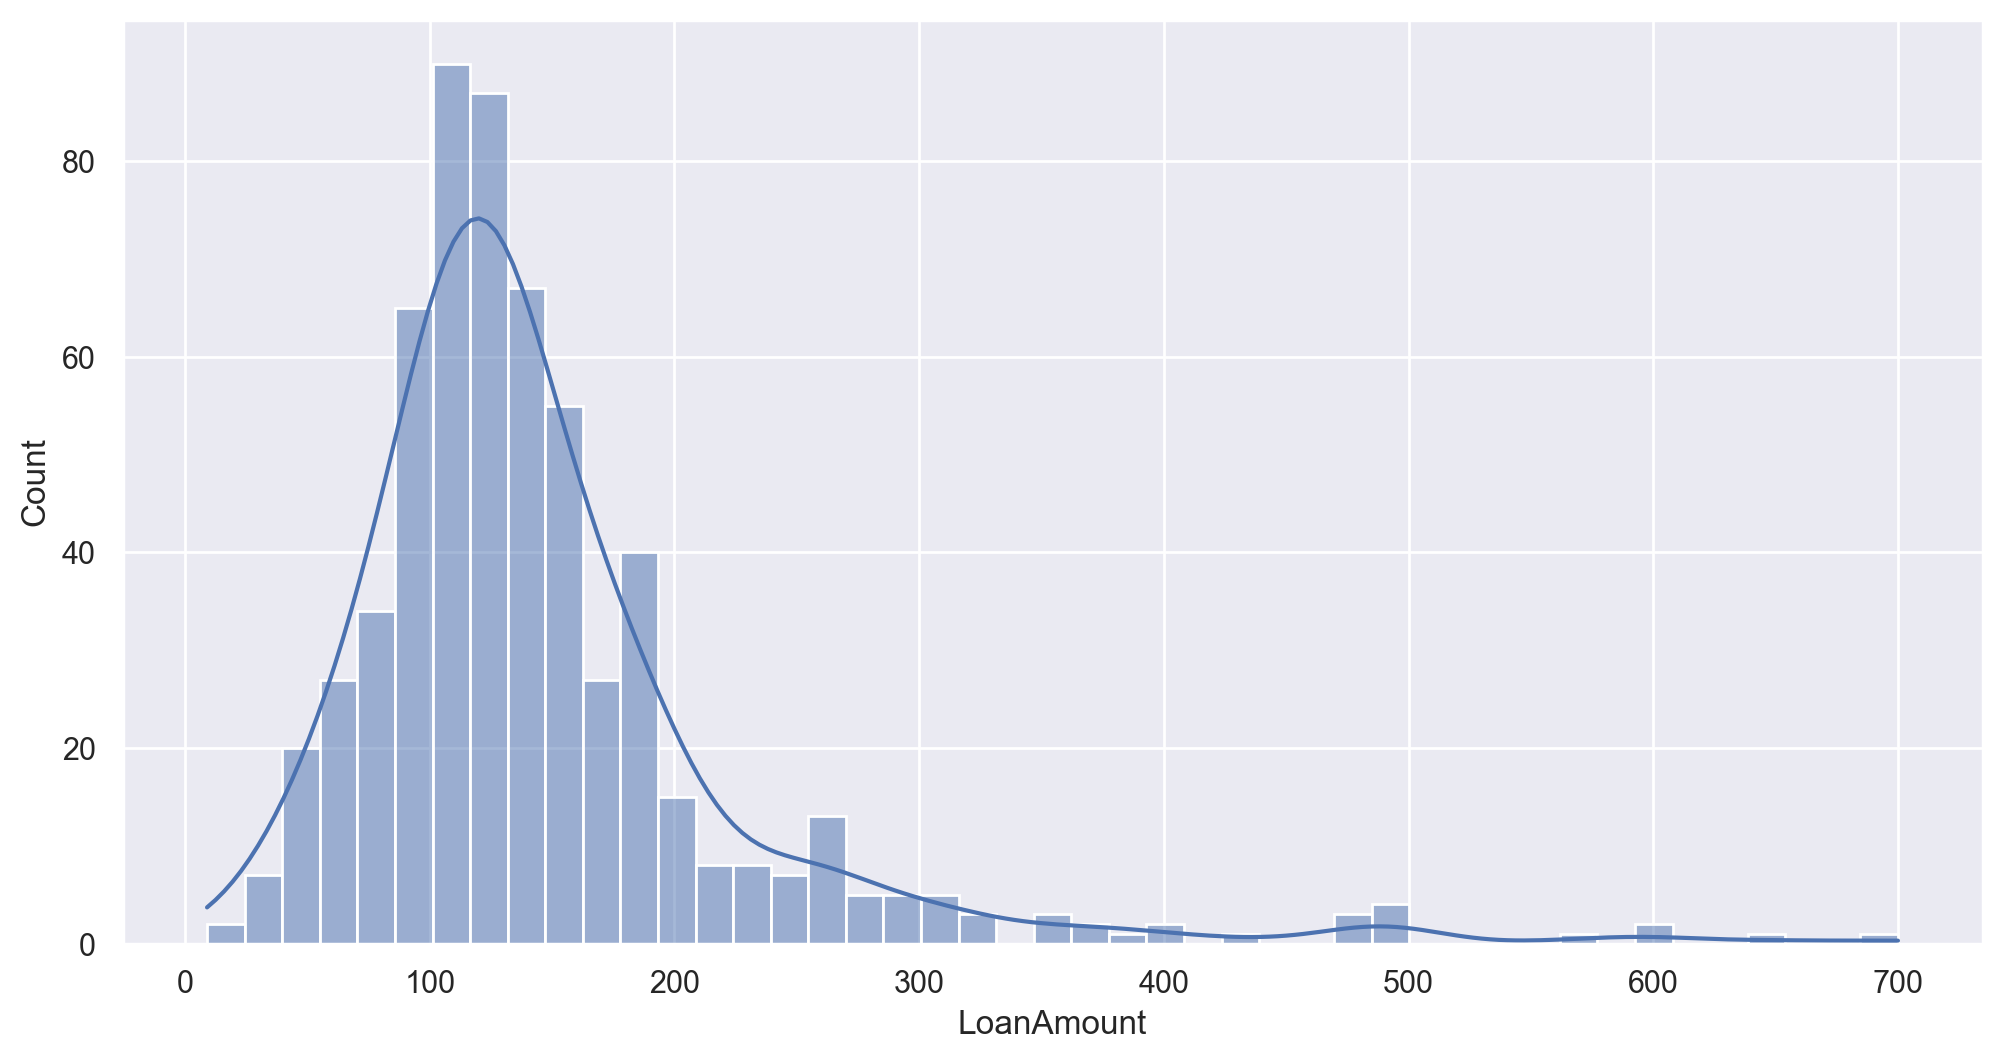

In [61]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data.LoanAmount, kde=True)
plt.show()

### Loan Term

In [62]:
data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [63]:
data[data.Loan_Amount_Term.isna()]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
19,Male,Yes,0,Graduate,No,115.0,NaN,1.0,Urban,1,6100.0
36,Male,Yes,0,Graduate,No,100.0,NaN,0.0,Urban,0,3158.0
44,Male,Yes,0,Not Graduate,Yes,96.0,NaN,1.0,Urban,1,4695.0
45,Female,No,0,Graduate,No,88.0,NaN,1.0,Urban,1,3410.0
73,Male,Yes,3+,Not Graduate,No,95.0,NaN,0.0,Semiurban,0,4755.0
112,Male,Yes,0,Not Graduate,No,152.0,NaN,0.0,Rural,0,7686.0
165,Male,Yes,0,Graduate,No,182.0,NaN,1.0,Rural,1,6873.0
197,Female,No,0,Not Graduate,No,120.0,NaN,1.0,Urban,1,4272.0
223,Male,Yes,0,Graduate,No,175.0,NaN,1.0,Semiurban,1,8588.0
232,Male,No,0,Not Graduate,No,120.0,NaN,1.0,Rural,1,5787.0


In [64]:
data.Loan_Amount_Term.median()

360.0

In [65]:
data.Loan_Amount_Term.fillna(value=data.Loan_Amount_Term.median(), inplace=True)

In [66]:
data.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
dtype: int64

<Figure size 2400x1200 with 0 Axes>

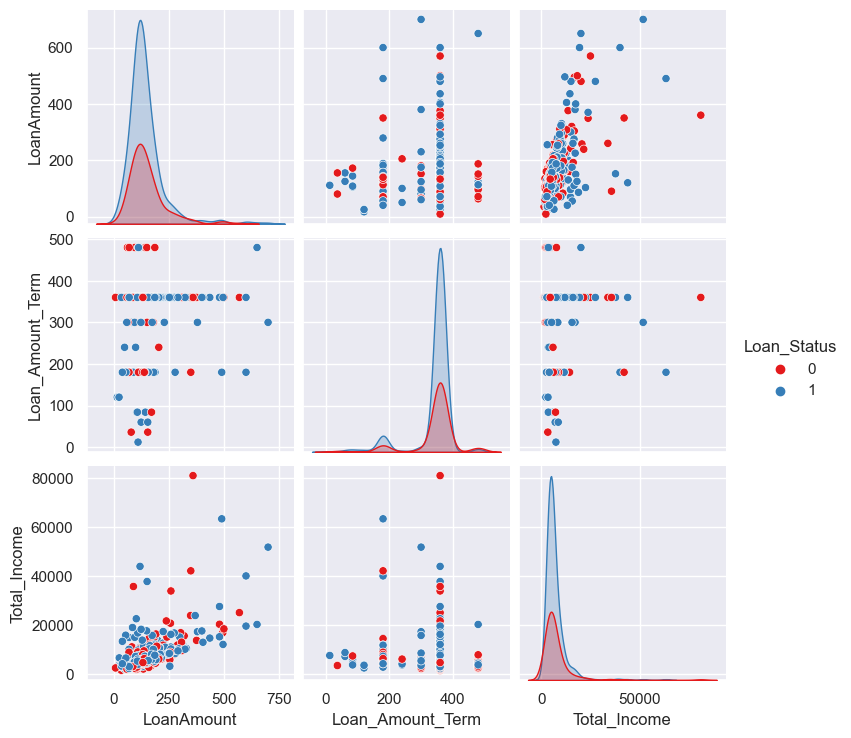

In [67]:
plt.figure(figsize=(12,6), dpi=200)
sns.pairplot(data=data[['LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_Status']],hue='Loan_Status', palette="Set1")
plt.show();

In [68]:
data=pd.get_dummies(data, drop_first=True)
data

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,136.489051,360.0,1.0,1,5849.0,1,0,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,0,6091.0,1,1,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,1,3000.0,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,1,4941.0,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,1,6000.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,1,2900.0,0,0,0,0,0,0,0,0,0
610,40.000000,180.0,1.0,1,4106.0,1,1,0,0,1,0,0,0,0
611,253.000000,360.0,1.0,1,8312.0,1,1,1,0,0,0,0,0,1
612,187.000000,360.0,1.0,1,7583.0,1,1,0,1,0,0,0,0,1


### Using DBSCAN to identify the outliers and exclude them from dataset 

In [69]:
from sklearn.cluster import DBSCAN

In [70]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data.drop("Loan_Status", axis=1))

In [71]:
scaled_data=pd.DataFrame(scaled_data, columns=data.drop("Loan_Status", axis=1).columns, index=data.index)
scaled_data.shape

(611, 13)

In [72]:
eps_values=[]
outliers=[]
for eps in np.linspace(0.001, 10, 50):
    dbs=DBSCAN(eps=eps, min_samples=13)
    dbs.fit(scaled_data)
    outlier=np.sum(dbs.labels_==-1)
    outliers.append(outlier)
    eps_values.append(eps)

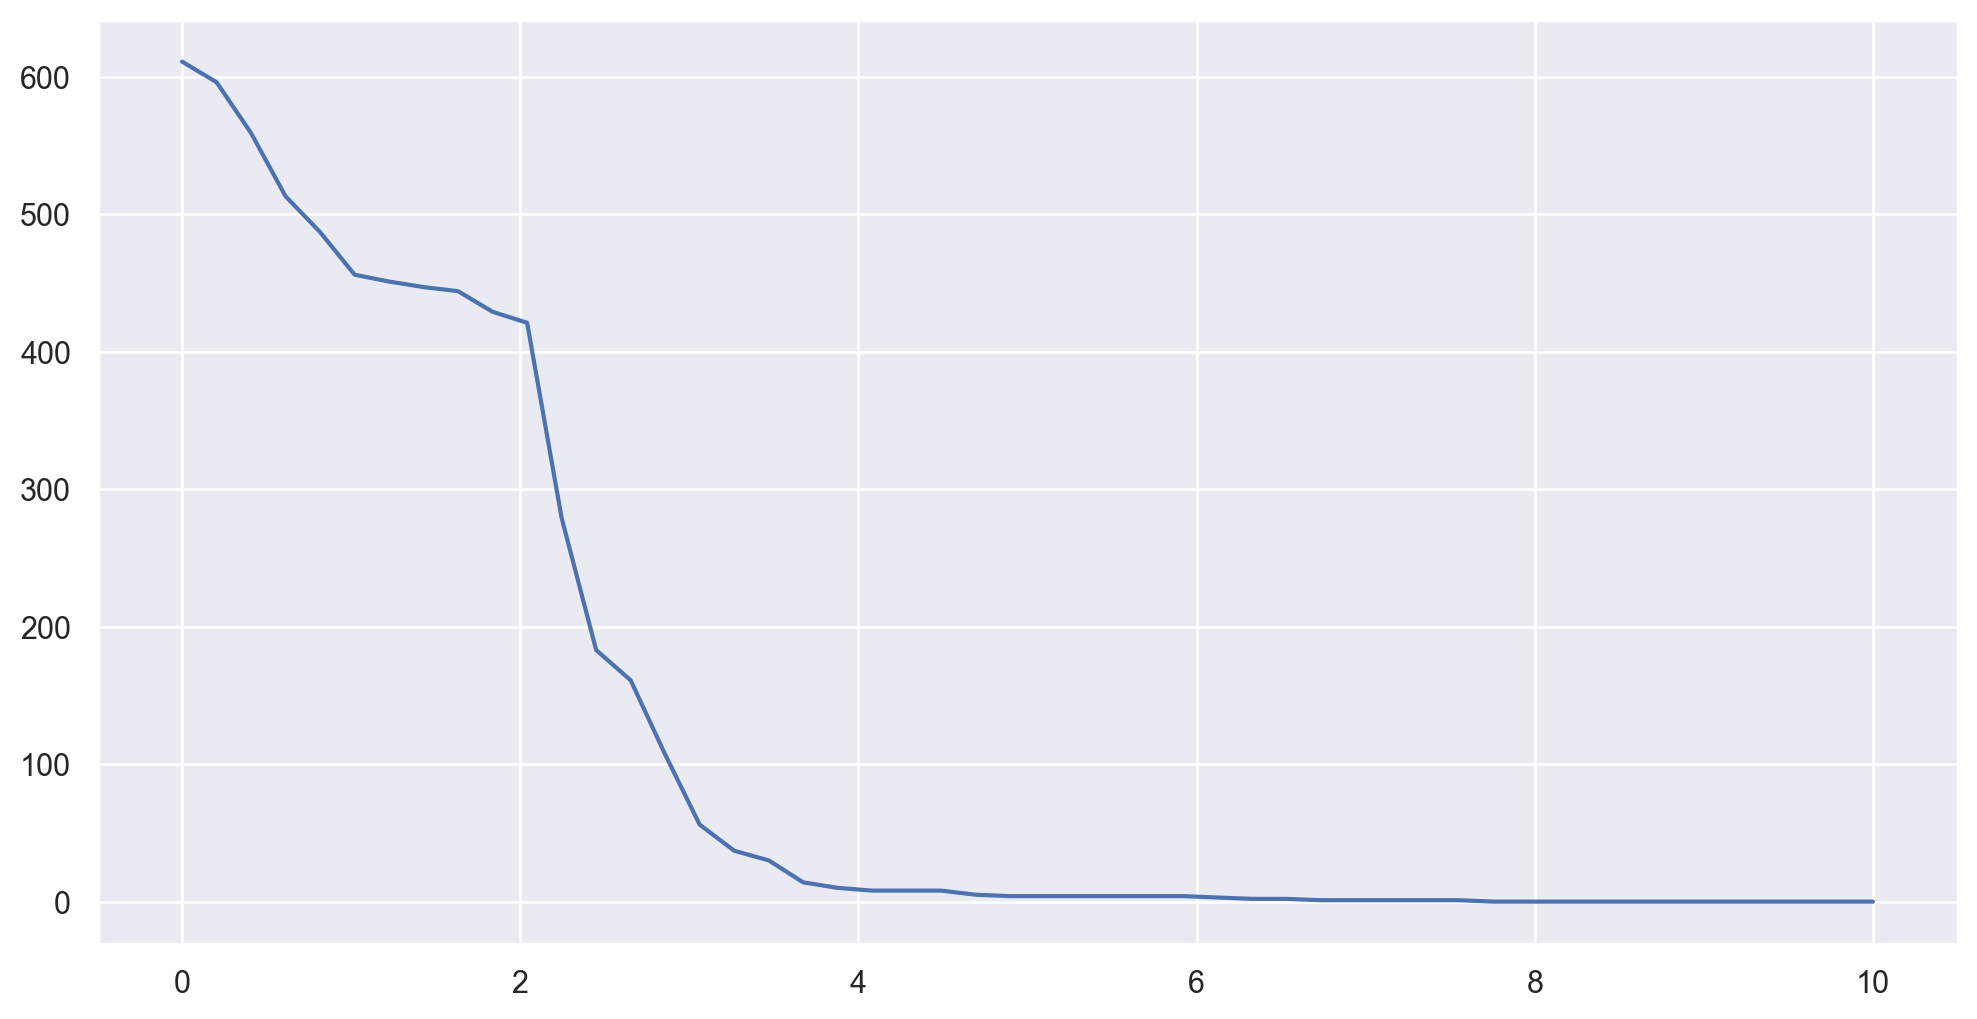

In [73]:
plt.figure(figsize=(12,6), dpi=200)
plt.plot(eps_values, outliers)
plt.show()

In [74]:
dbs=DBSCAN(eps=2.9, min_samples=10)
dbs.fit(scaled_data)

DBSCAN(eps=2.9, min_samples=10)

In [75]:
len(dbs.labels_[dbs.labels_==-1])

68

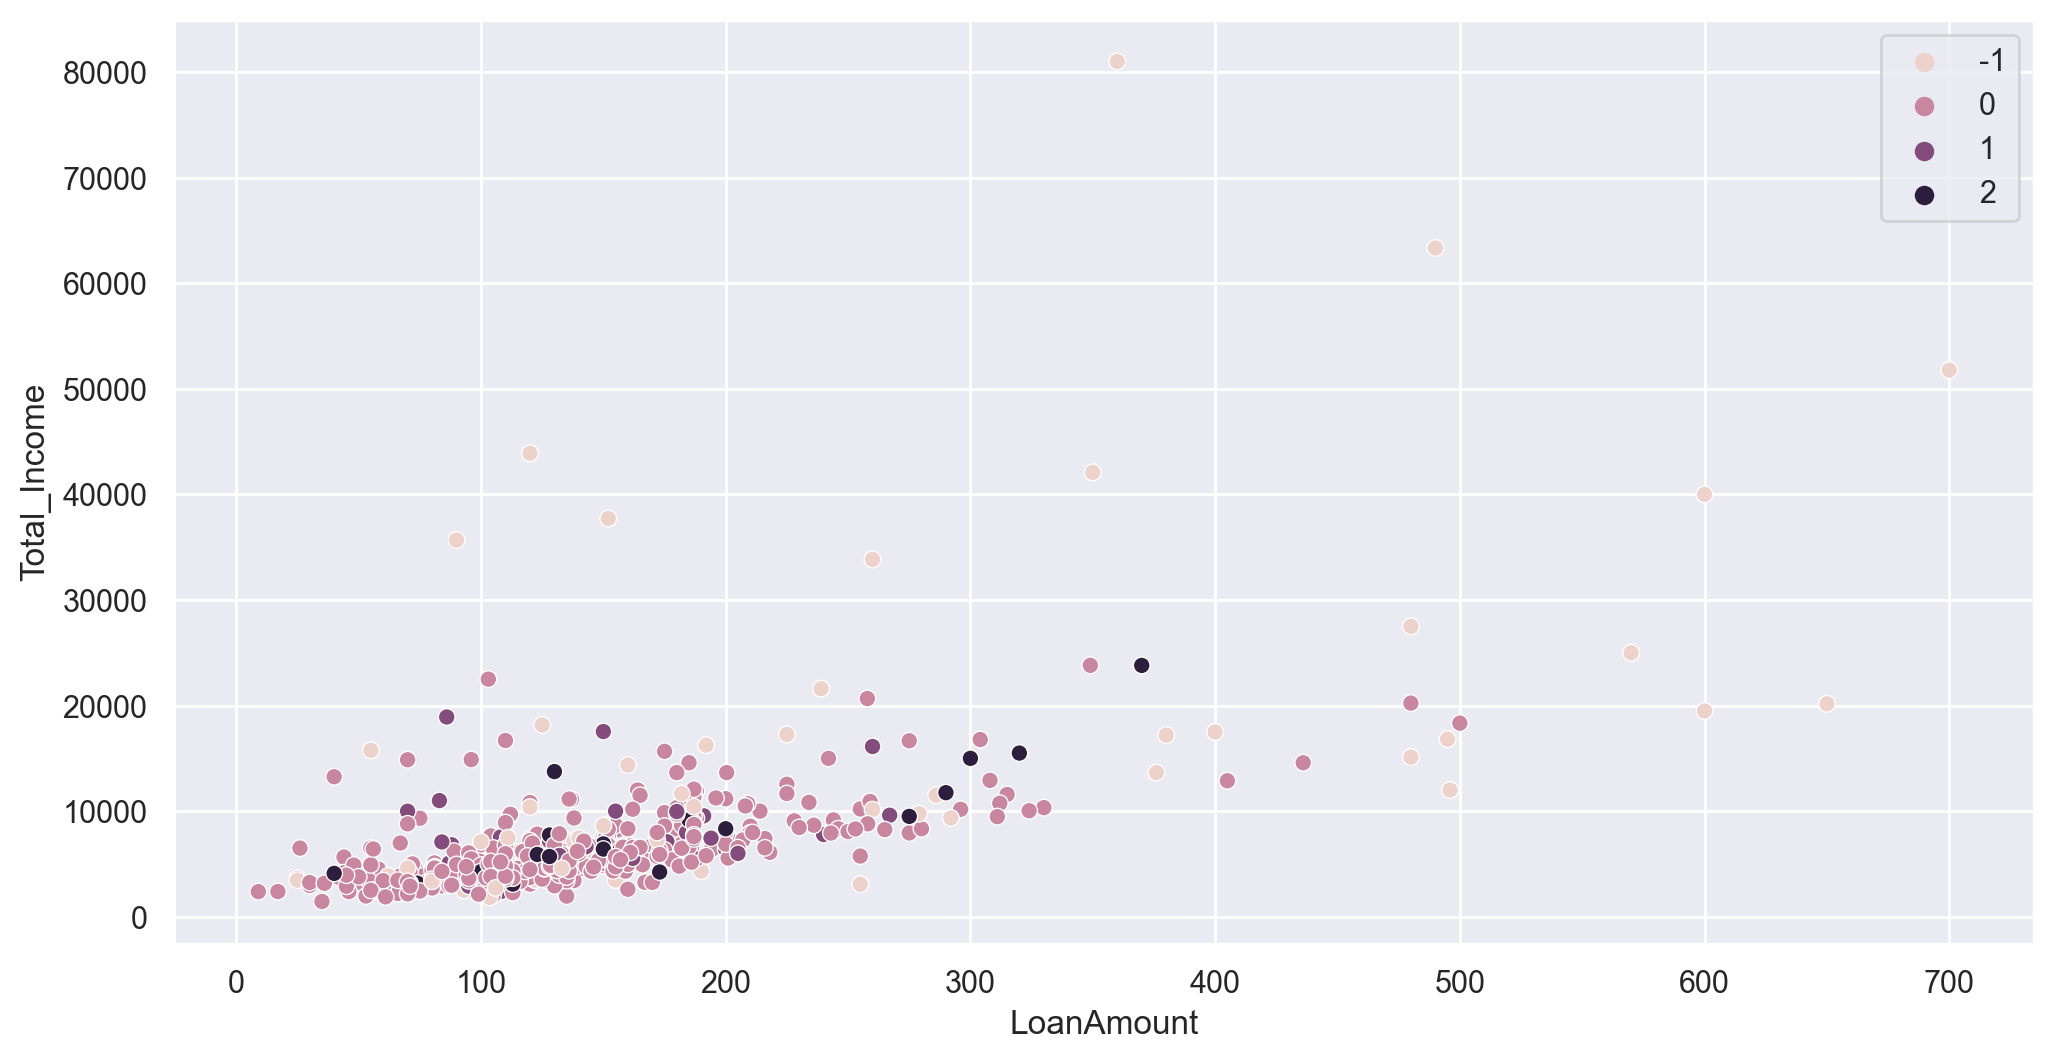

In [76]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=data, x="LoanAmount", y=data.Total_Income, hue=dbs.labels_)
plt.show()

In [77]:
outlier_indices=np.where(dbs.labels_==-1)[0]
outlier_indices

array([ 16,  54,  62,  66,  68,  71,  74,  79, 112, 127, 129, 132, 154,
       170, 171, 176, 182, 184, 201, 212, 225, 235, 243, 251, 252, 253,
       260, 278, 311, 323, 331, 332, 336, 351, 367, 368, 370, 371, 407,
       408, 415, 428, 435, 436, 440, 446, 463, 468, 470, 490, 492, 494,
       503, 519, 520, 522, 531, 537, 543, 554, 558, 578, 582, 586, 589,
       597, 601, 610], dtype=int64)

In [78]:
clean_data=pd.DataFrame(np.delete(np.array(data), outlier_indices, axis=0), columns=data.columns)
clean_data

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,136.489051,360.0,1.0,1.0,5849.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,128.000000,360.0,1.0,0.0,6091.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.000000,360.0,1.0,1.0,3000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,120.000000,360.0,1.0,1.0,4941.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,141.000000,360.0,1.0,1.0,6000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,108.000000,360.0,1.0,1.0,5182.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,71.000000,360.0,1.0,1.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540,40.000000,180.0,1.0,1.0,4106.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
541,253.000000,360.0,1.0,1.0,8312.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


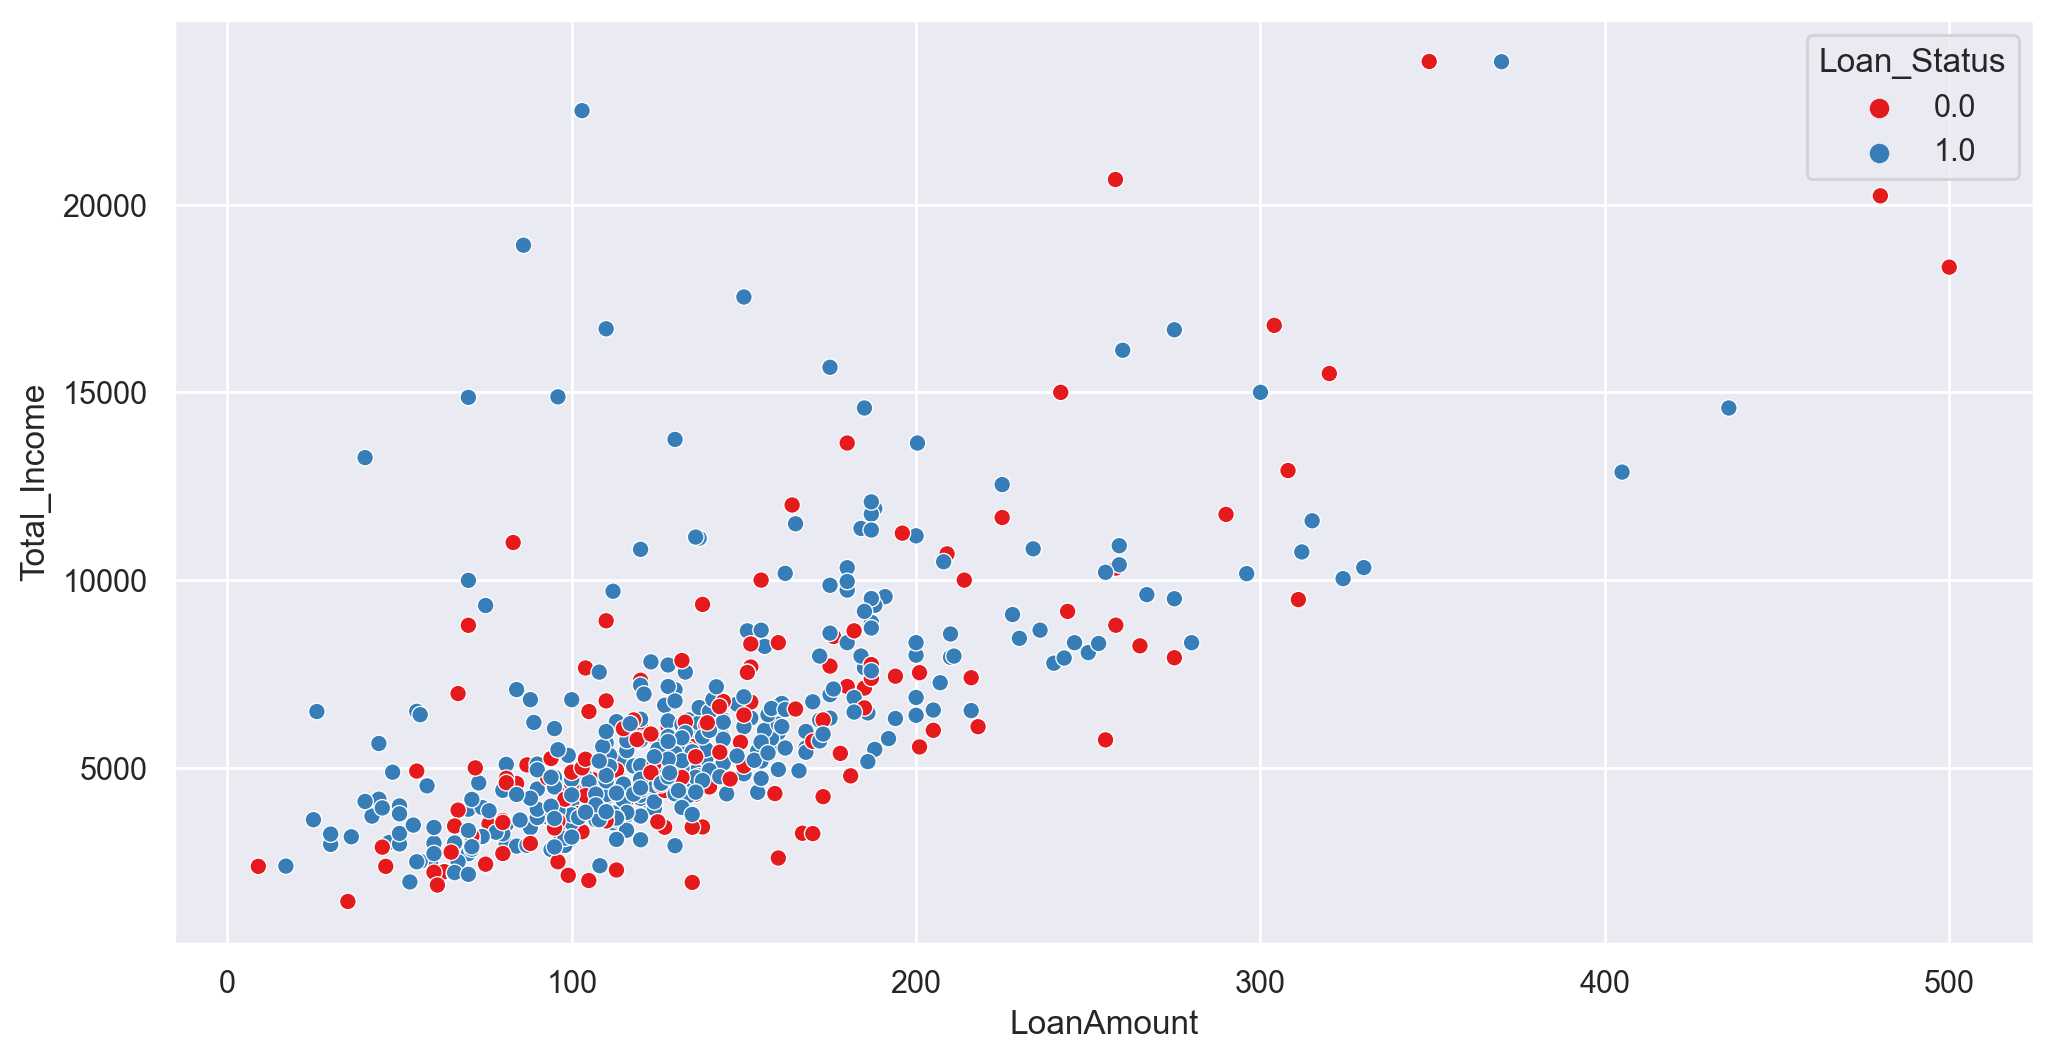

In [79]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=clean_data, x="LoanAmount", y=clean_data.Total_Income, hue="Loan_Status", palette="Set1")
plt.show()

In [80]:
Counter(clean_data.Loan_Status)

Counter({1.0: 382, 0.0: 161})

In [81]:
class_weight=Counter(clean_data.Loan_Status)[1]/Counter(clean_data.Loan_Status)[0]
class_weight

2.372670807453416

## Predictive modelling using different algorithms

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [157]:
X=clean_data.drop("Loan_Status", axis=1)
y=clean_data.Loan_Status

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [159]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [160]:
def model_train(model, parameters, x_train, y_train):
    bayes=BayesSearchCV(model, search_spaces=parameters, cv=5, scoring='f1')
    bayes.fit(x_train, y_train)
    return print(classification_report(y_train, bayes.predict(x_train)))

In [161]:
def model_test(model, parameters, x_train, y_train):
    bayes=BayesSearchCV(model, search_spaces=parameters, cv=5, scoring='f1')
    bayes.fit(x_train, y_train)
    return print(classification_report(y_test, bayes.predict(x_test)))

### Logistic regression

In [101]:
log_model=LogisticRegression(max_iter=10000, class_weight={1:class_weight, 0:1})
log_params={"C": Real(0,10)}

In [102]:
model_train(log_model, log_params, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.77      0.24      0.37       125
         1.0       0.76      0.97      0.85       309

    accuracy                           0.76       434
   macro avg       0.76      0.61      0.61       434
weighted avg       0.76      0.76      0.71       434



In [103]:
model_test(log_model, log_params, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.73      0.31      0.43        36
         1.0       0.73      0.95      0.83        73

    accuracy                           0.73       109
   macro avg       0.73      0.63      0.63       109
weighted avg       0.73      0.73      0.70       109



### SVM Classifier

In [104]:
svm=SVC(class_weight='balanced', kernel='linear')
svm_params={'C': Real(0.1,10),
       'gamma': Categorical(['scale', 'auto'])
       }

In [105]:
model_train(svm, svm_params, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.

              precision    recall  f1-score   support

         0.0       0.68      0.45      0.54       125
         1.0       0.80      0.92      0.86       309

    accuracy                           0.78       434
   macro avg       0.74      0.68      0.70       434
weighted avg       0.77      0.78      0.77       434



In [106]:
model_test(svm, svm_params, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        36
         1.0       0.80      0.88      0.84        73

    accuracy                           0.77       109
   macro avg       0.74      0.72      0.73       109
weighted avg       0.76      0.77      0.76       109



### Random Forest

In [107]:
random_forest=RandomForestClassifier(class_weight={0:1, 1:class_weight})

In [108]:
rfc_search = {
    'max_features': Categorical(['sqrt', 'log2', 'auto']),
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(2, 10)
}

In [109]:
model_train(random_forest, rfc_search, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default 

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.80       125
         1.0       0.88      1.00      0.94       309

    accuracy                           0.90       434
   macro avg       0.94      0.83      0.87       434
weighted avg       0.91      0.90      0.90       434



In [110]:
model_test(random_forest, rfc_search, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default 

              precision    recall  f1-score   support

         0.0       0.74      0.56      0.63        36
         1.0       0.80      0.90      0.85        73

    accuracy                           0.79       109
   macro avg       0.77      0.73      0.74       109
weighted avg       0.78      0.79      0.78       109



c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



### AdaBoost Classifier

In [163]:
ada_model=AdaBoostClassifier()

In [164]:
ada_search = {
    'learning_rate': Real(0.01, 10),
    'n_estimators': Integer(100, 500),
#     'algorithm': Categorical(['SAMME', 'SAMME.R']) 
}

In [113]:
model_train(ada_model, ada_search, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.68      0.45      0.54       125
         1.0       0.80      0.92      0.86       309

    accuracy                           0.78       434
   macro avg       0.74      0.68      0.70       434
weighted avg       0.77      0.78      0.77       434



In [114]:
model_test(ada_model, ada_search, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        36
         1.0       0.80      0.88      0.84        73

    accuracy                           0.77       109
   macro avg       0.74      0.72      0.73       109
weighted avg       0.76      0.77      0.76       109



### XGBoost Classifier

In [115]:
xgb_model=XGBClassifier(scale_pos_weight=class_weight)

In [116]:
xgb_params = {
    'learning_rate': Real(0.01, 5),
    'n_estimators': Integer(1, 1000),
    'max_depth': Integer(3,10),
    'subsample': Real(0.5,1),
    'colsample_bytree': Real(0.5,1)
    
    }

In [117]:
model_train(xgb_model, xgb_params, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.68      0.45      0.54       125
         1.0       0.80      0.92      0.86       309

    accuracy                           0.78       434
   macro avg       0.74      0.68      0.70       434
weighted avg       0.77      0.78      0.77       434



In [118]:
model_test(xgb_model, xgb_params, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.75      0.17      0.27        36
         1.0       0.70      0.97      0.82        73

    accuracy                           0.71       109
   macro avg       0.73      0.57      0.54       109
weighted avg       0.72      0.71      0.64       109



### Model choosing

In [165]:
bayes=BayesSearchCV(ada_model, search_spaces=ada_search, cv=5, scoring='f1')
bayes.fit(x_train, y_train)

BayesSearchCV(cv=5, estimator=AdaBoostClassifier(), scoring='f1',
              search_spaces={'learning_rate': Real(low=0.01, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

In [167]:
pred=bayes.predict(x_test)
bayes.best_params_

OrderedDict([('learning_rate', 8.653370813871481), ('n_estimators', 328)])

In [172]:
print(classification_report(y_train, bayes.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.68      0.45      0.54       125
         1.0       0.80      0.92      0.86       309

    accuracy                           0.78       434
   macro avg       0.74      0.68      0.70       434
weighted avg       0.77      0.78      0.77       434



In [168]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        36
         1.0       0.80      0.88      0.84        73

    accuracy                           0.77       109
   macro avg       0.74      0.72      0.73       109
weighted avg       0.76      0.77      0.76       109



In [173]:
pd.options.display.float_format = '{:.3f}'.format
ada_features=pd.DataFrame(bayes.best_estimator_.feature_importances_, 
             columns=['Importances']).sort_values(by="Importances", ascending=False)
ada_features["Features"]=X.columns
ada_features

,Importances,Features
2,1.000,LoanAmount
0,0.000,Loan_Amount_Term
1,0.000,Credit_History
3,0.000,Total_Income
4,0.000,Gender_Male
5,0.000,Married_Yes
6,0.000,Dependents_1
7,0.000,Dependents_2
8,0.000,Dependents_3+
9,0.000,Education_Not Graduate


In [174]:
fig=px.bar(ada_features, x='Features', y='Importances', 
           text=['{:.2f}'.format(val) for val in ada_features['Importances']],
           title="Feature importance")
fig.show()

After all these workings and analysis, I conclude that adaboost algorithm worked better than other models: there are two reason for that:
1) F1_score (harmonised average of precision and recall) is higher on test data comparing to  other models;
2) Although the random forest model predicted higher accuracy than adaboost, this model overfitted the data more than adaboost

Additionally, I can say that according to the feature importances, Loan amount would be sufficient for the model to classifiy the loan as yes or no with 77% accuracy. However I understand that this result is not best or maybe it could be improved, but the dataset is too small, so this result might be considered as sufficient.